<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/Emission_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [228]:
df = pd.read_csv('/content/emissions.csv')
df = df[(df['sector-name'] != 'Total carbon dioxide emissions from all sectors') & (df['fuel-name'] != 'All Fuels') & (df['state-name'] != 'United States')]

In [197]:
df.sample(5)

,year,state-name,sector-name,fuel-name,value
27184,1993,Colorado,Industrial carbon dioxide emissions,Coal,1.542234
677,1970,New Jersey,Residential carbon dioxide emissions,Natural Gas,7.627722
57312,2019,New Mexico,Industrial carbon dioxide emissions,Natural Gas,5.666986
35894,2000,Nevada,Industrial carbon dioxide emissions,Natural Gas,0.591070
898,1970,Rhode Island,Electric Power carbon dioxide emissions,Petroleum,1.436088


# How my Emissions Looks like when it comes to distribution?

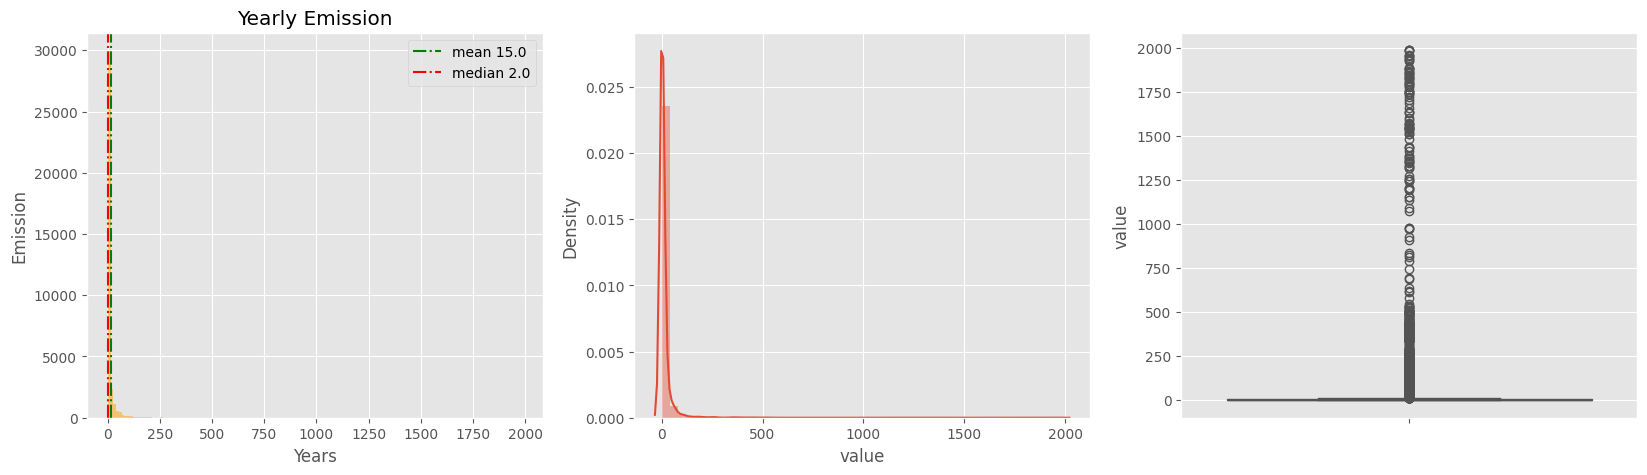

In [198]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))

# Plotting the data with markers and labels
ax[0].hist(df['value'],color='Orange', alpha=0.5,bins=150)

ax[0].axvline(x=df['value'].mean(), color='green', linestyle='-.',label=f'mean {np.round(df["value"].mean())}')
ax[0].axvline(x=df['value'].median(), color='red', linestyle='-.',label=f'median {np.round(df["value"].median())}')

# Title and labels
ax[0].set_title('Yearly Emission')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Emission')
ax[0].legend()

sns.distplot(df['value'],ax=ax[1])
sns.boxplot(df['value'],ax=ax[2])

plt.show()

# What year have the highest and least emissions occur?

In [10]:
yearly_emissions = df.groupby('year',as_index=False).agg({'value':'mean'})

In [34]:
highest_year_emission = yearly_emissions.sort_values(by='value').head(1)['year'].values[0]
lowest_year_emission = yearly_emissions.sort_values(by='value').tail(1)['year'].values[0]

2008

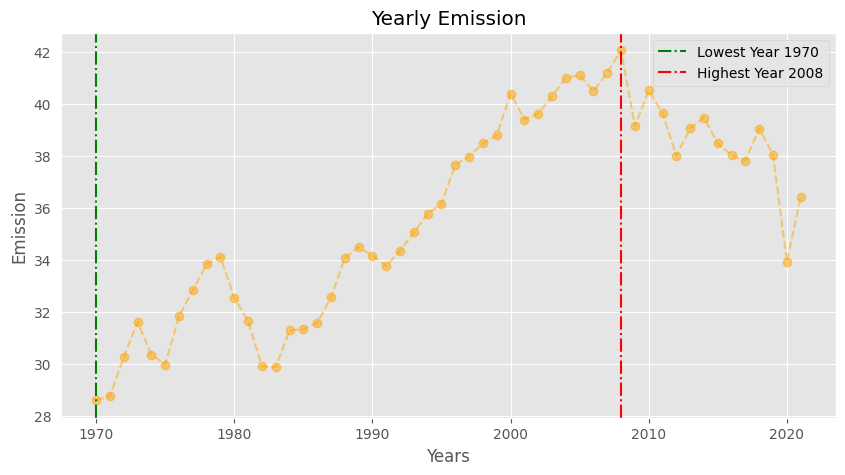

In [164]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the data with markers and labels
ax.plot(yearly_emissions['year'], yearly_emissions['value'], marker='o', linestyle='--',color='Orange', alpha=0.5)

# Removing y ticks
ax.yaxis.set_ticks_position('none')

lowest_year_emission = yearly_emissions.sort_values(by='value').head(1)['year'].values[0]
highest_year_emission = yearly_emissions.sort_values(by='value').tail(1)['year'].values[0]

ax.axvline(x=lowest_year_emission, color='green', linestyle='-.',label=f'Lowest Year {lowest_year_emission}')
ax.axvline(x=highest_year_emission, color='red', linestyle='-.',label=f'Highest Year {highest_year_emission}')

# Title and labels
plt.title('Yearly Emission')
plt.xlabel('Years')
plt.ylabel('Emission')
plt.legend()

plt.show()

# Which sector cause how much emission on an average?

In [201]:
sector_emissions = df.groupby(['sector-name'],as_index=False).agg({'value':'mean'})

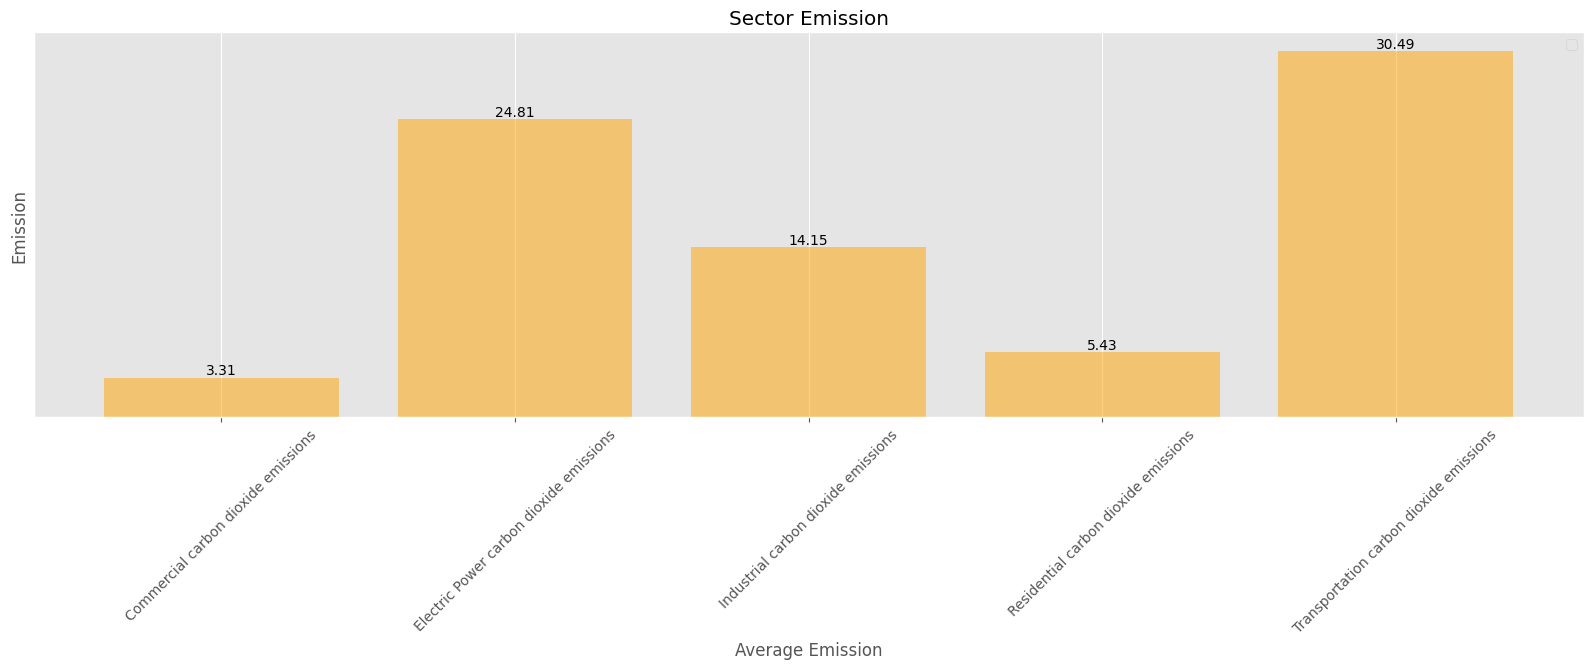

In [208]:
fig, ax = plt.subplots(figsize=(20, 5))

# Plotting the data with markers and labels
bars =  ax.bar(sector_emissions['sector-name'], sector_emissions['value'],color='orange', alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


# Title and labels
plt.title('Sector Emission')
plt.yticks([])
plt.xlabel('Average Emission')
plt.ylabel('Emission')
plt.legend()
plt.xticks(rotation=45)

plt.show()

# Which state have the highest and least emissions?

In [229]:
state_emissions = df.groupby(['state-name'],as_index=False).agg({'value':'mean'})

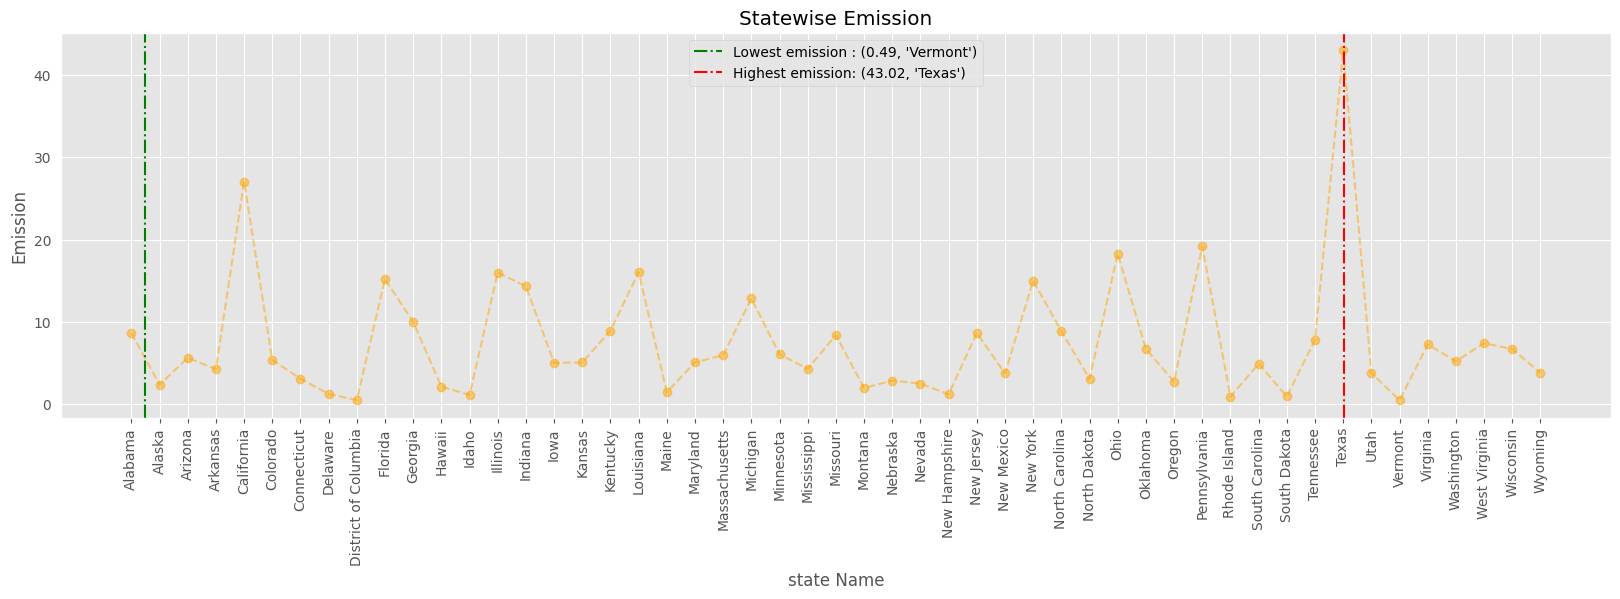

In [235]:
fig, ax = plt.subplots(figsize=(20, 5))

# Plotting the data with markers and labels
ax.plot(state_emissions['state-name'], state_emissions['value'], marker='o', linestyle='--',color='Orange', alpha=0.5)

# Removing y ticks
ax.yaxis.set_ticks_position('none')

lowest_year_emission = state_emissions.sort_values(by='value').head(1)['value'].values[0]
least_state_name = state_emissions.sort_values(by='value').head(1)['state-name'].values[0]
highest_year_emission = state_emissions.sort_values(by='value').tail(1)['value'].values[0]
highest_state_name = state_emissions.sort_values(by='value').tail(1)['state-name'].values[0]

ax.axvline(x=lowest_year_emission, color='green', linestyle='-.',label=f'Lowest emission : {np.round(lowest_year_emission,2),least_state_name}')
ax.axvline(x=highest_year_emission, color='red', linestyle='-.',label=f'Highest emission: {np.round(highest_year_emission,2),highest_state_name}')

# Title and labels
plt.title('Statewise Emission')
plt.xlabel('state Name')
plt.ylabel('Emission')
plt.xticks(rotation=90)
plt.legend()

plt.show()

#  On an average how much emissions each fuel type does?

In [209]:
fueltype_emissions = df.groupby(['fuel-name'],as_index=False).agg({'value':'mean'})

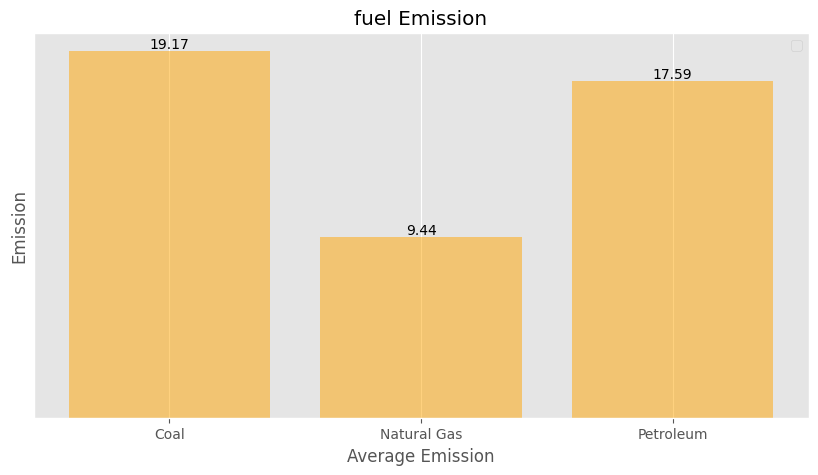

In [210]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the data with markers and labels
bars =  ax.bar(fueltype_emissions['fuel-name'], fueltype_emissions['value'],color='orange', alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


# Title and labels
plt.title('fuel Emission')
plt.yticks([])
plt.xlabel('Average Emission')
plt.ylabel('Emission')
plt.legend()

plt.show()

In [211]:
yearly_fueltype_emissions = df.query("`fuel-name` != 'All Fuels'").groupby(['year','fuel-name'],as_index=False).agg({'value':'mean'})

In [212]:
def getFuelTypeYearlyEmission(reverse=True):
  yearly_fueltype = defaultdict(list)
  for fuel in df['fuel-name'].unique():
    value = yearly_fueltype_emissions.query(f"`fuel-name` == '{fuel}'").sort_values(by='value',ascending=reverse).head(1).values.tolist()
    if value:
      yearly_fueltype['year'].append(value[0][0])
      yearly_fueltype['fuel'].append(value[0][1] )
      yearly_fueltype['avg emission'].append(value[0][-1] )
  return pd.DataFrame(yearly_fueltype)

In [213]:
fuel_least_yearly_emission = getFuelTypeYearlyEmission()

In [214]:
def showgetFuelTypeYearlyEmission(data=None,title='Least'):
  fig, ax = plt.subplots(figsize=(10, 5))

  # Plotting the line plot

  # Plotting the bar plot
  bars = ax.bar(data['fuel'], data['avg emission'], color='orange', alpha=0.5, label='Average Emission')

  # Adding values on top of bars
  for bar, year, value in zip(bars, data['year'], data['avg emission']):
      ax.text(bar.get_x() + bar.get_width() / 2, value / 2, f"({year})\n{round(value, 2)}", va='center', ha='center', color='white', weight='bold')


  plt.title(f'{title} year / fuel type / average emission')
  plt.xlabel('Feul Type')
  plt.ylabel('Average Emission')
  plt.legend()
  plt.show()

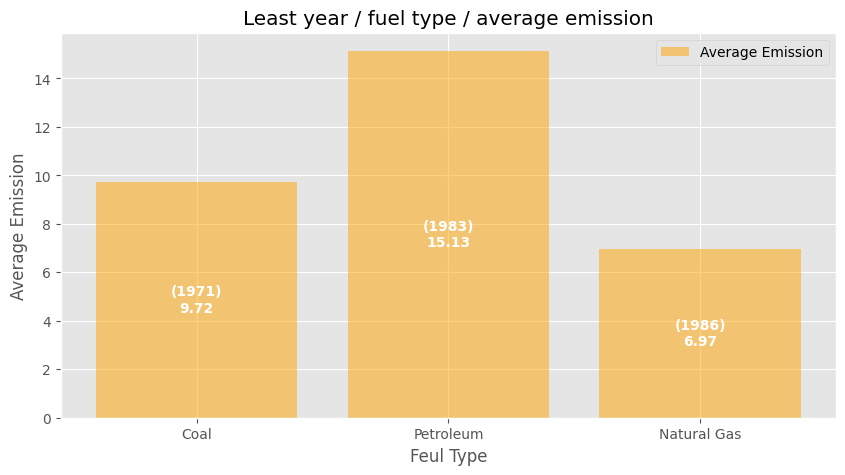

In [215]:
showgetFuelTypeYearlyEmission(fuel_least_yearly_emission)

In [216]:
fuel_highest_yearly_emission = getFuelTypeYearlyEmission(False)

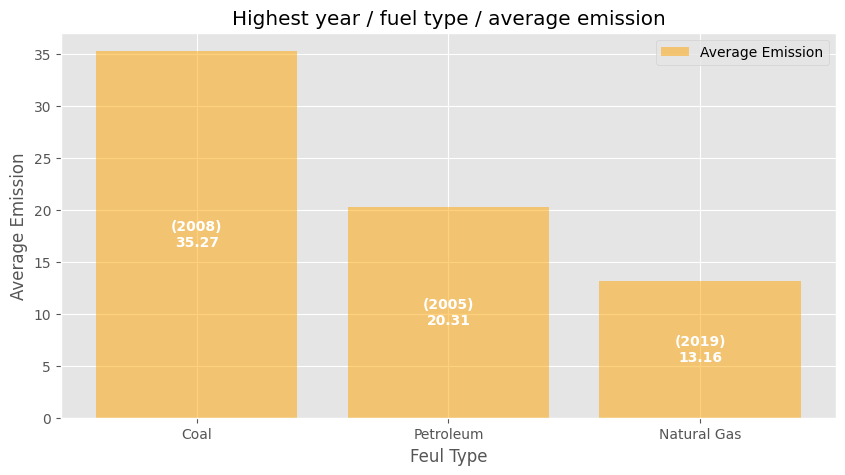

In [217]:
showgetFuelTypeYearlyEmission(fuel_highest_yearly_emission,'Highest')

# Which state have highest emission and what type of fuel have the highest impact?

In [244]:
df.groupby(['state-name','fuel-name'],as_index=False).agg({'value':'sum'}).sort_values(by='value',ascending=False).head()

,state-name,fuel-name,value
131,Texas,Petroleum,13333.446378
14,California,Petroleum,11898.392148
130,Texas,Natural Gas,10909.838796
114,Pennsylvania,Coal,6636.392111
98,New York,Petroleum,6584.797851


# Which year and state have highest emission and what type of fuel have the highest impact?

In [248]:
df.groupby(['state-name','fuel-name','year'],as_index=False).agg({'value':'sum'}).sort_values(by='value',ascending=False).head(5)

,state-name,fuel-name,year,value
6812,Texas,Petroleum,2019,340.059539
6811,Texas,Petroleum,2018,333.086547
6814,Texas,Petroleum,2021,325.415872
6810,Texas,Petroleum,2017,320.087562
6809,Texas,Petroleum,2016,315.609320
